In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
all_data=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
all_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [3]:
features = ['Close']
eval_data= pd.DataFrame(columns=features, data=all_data, index=all_data.index)
eval_data.head()

,Close
Date,
2000-01-03,170.00
2000-01-04,173.80
2000-01-05,166.95
2000-01-06,168.30
2000-01-07,168.35


(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]), <a list of 8 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

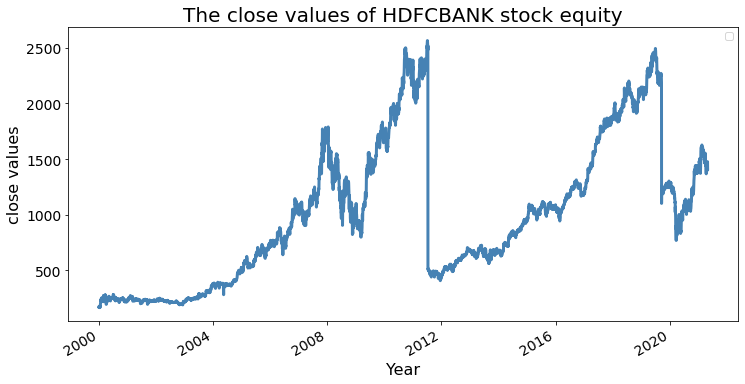

In [4]:
# line plot - the yearly accumulated rainfall in Barcelona
eval_data.plot(color='steelblue', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)

In [5]:
eval_data['SMA_100'] = eval_data['Close'].rolling(100, min_periods=1).mean()

In [6]:
eval_data.head(7)
eval_data.info()

,Close,SMA_100
Date,,
2000-01-03,170.00,170.000000
2000-01-04,173.80,171.900000
2000-01-05,166.95,170.250000
2000-01-06,168.30,169.762500
2000-01-07,168.35,169.480000
2000-01-10,165.90,168.883333
2000-01-11,163.40,168.100000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    5306 non-null   float64
 1   SMA_100  5306 non-null   float64
dtypes: float64(2)
memory usage: 124.4 KB


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

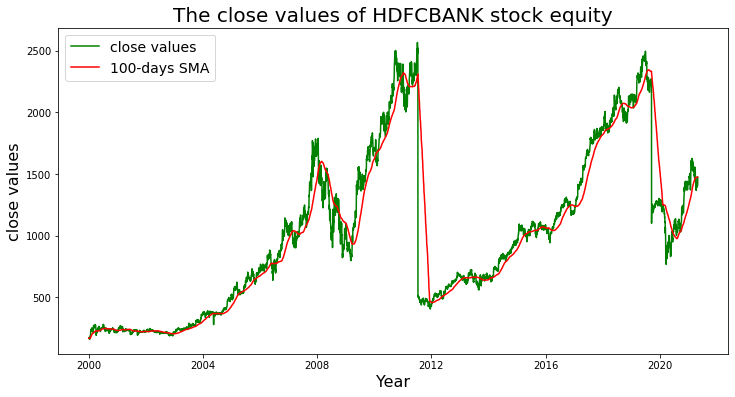

In [7]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['SMA_100'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '100-days SMA'], fontsize=14)
plt.show()

In [9]:
#!pip install pmdarima

In [10]:
import sys
print("python version",sys.version)
import numpy
print("numpy version",numpy.__version__)
import scipy
print("scipy version",scipy.__version__)
import sklearn
print("scikit -learn version",sklearn.__version__)
import pandas
print("pandas version",pandas.__version__)
import statsmodels
print("statsmodels version",statsmodels.__version__)
import pmdarima
print("pyramid version",pmdarima.__version__)
import pip
print("pip version",pip.__version__)

python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version 1.21.6
scipy version 1.4.1
scikit -learn version 1.0.2
pandas version 1.3.5
statsmodels version 0.13.2
pyramid version 1.8.5
pip version 21.1.3


In [11]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from sklearn import metrics
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [12]:
features = ['SMA_100']
df1=eval_data[features]
df1.head()

,SMA_100
Date,
2000-01-03,170.0000
2000-01-04,171.9000
2000-01-05,170.2500
2000-01-06,169.7625
2000-01-07,169.4800


In [13]:
df1.index = pd.to_datetime(df1.index)
df2=df1.resample('1M').mean()
df2.head()

,SMA_100
Date,
2000-01-31,171.385676
2000-02-29,201.899434
2000-03-31,220.522623
2000-04-30,227.655610
2000-05-31,231.318616


In [14]:
df2.head()
df2.tail()
df2.shape
df2.info()
df2.describe()

,SMA_100
Date,
2000-01-31,171.385676
2000-02-29,201.899434
2000-03-31,220.522623
2000-04-30,227.655610
2000-05-31,231.318616


,SMA_100
Date,
2020-12-31,1195.060455
2021-01-31,1269.703475
2021-02-28,1354.048750
2021-03-31,1437.682929
2021-04-30,1472.716711


(256, 1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2000-01-31 to 2021-04-30
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMA_100  256 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


,SMA_100
count,256.000000
mean,998.214132
std,622.415028
min,171.385676
25%,475.754401
50%,985.610714
75%,1408.971795
max,2341.067375


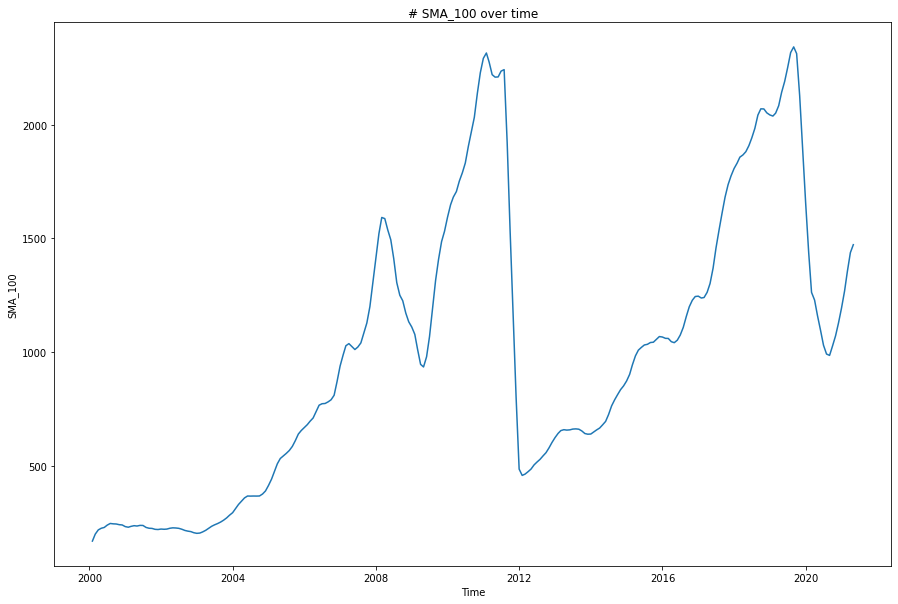

In [15]:
plt.figure(figsize=(15,10))
plt.plot(df2)
plt.xlabel('Time')
plt.ylabel('SMA_100')
plt.title("# SMA_100 over time")
plt.show;

In [16]:
decomposition=seasonal_decompose(df2,model='multiplicative',extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

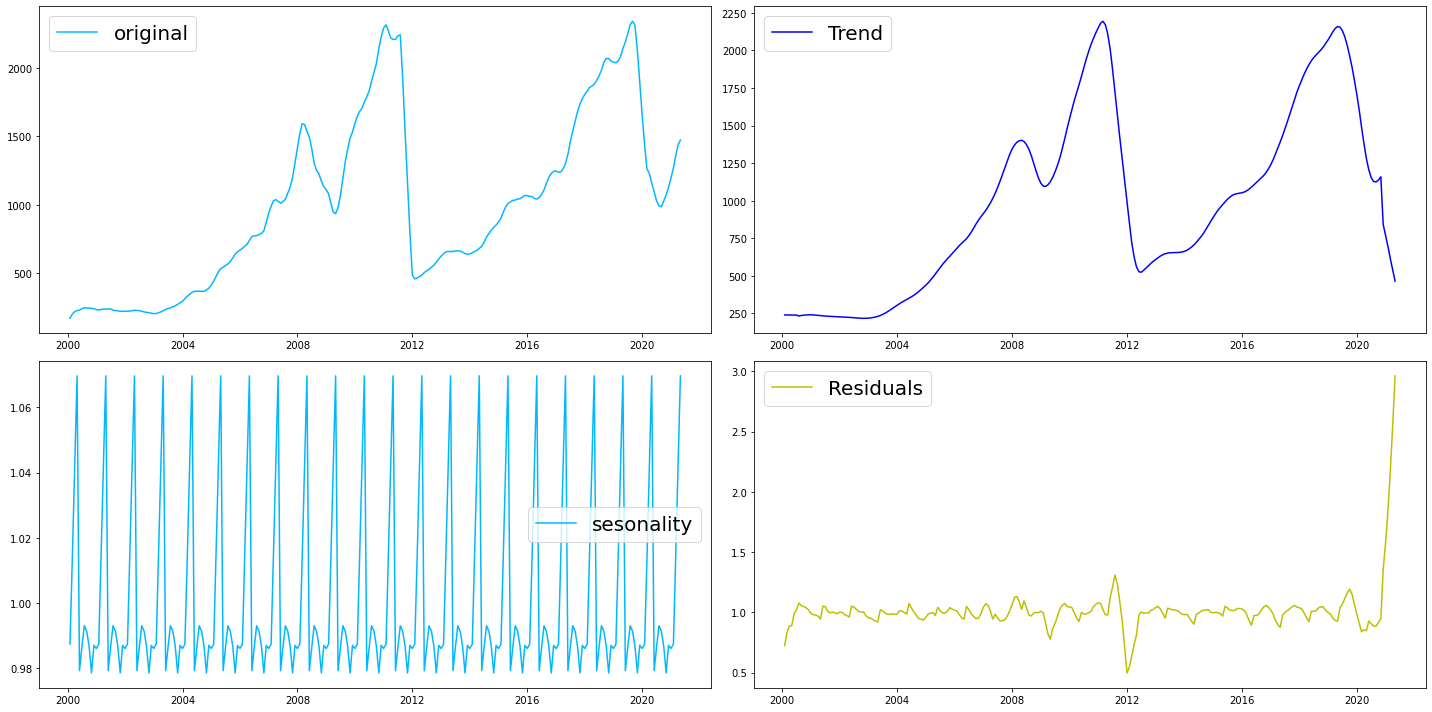

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

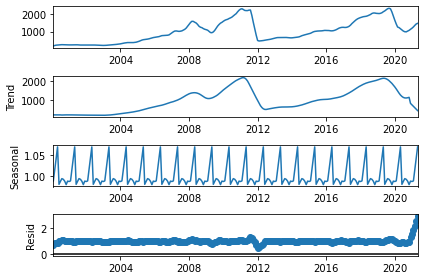

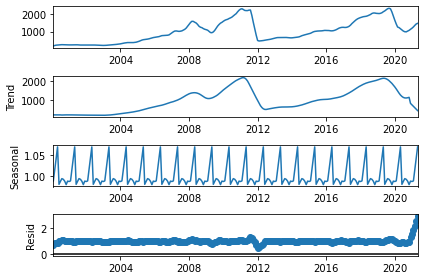

In [18]:
decomposition.plot()

In [19]:
decomposition=seasonal_decompose(df2,model='additive')

<Figure size 1440x720 with 0 Axes>

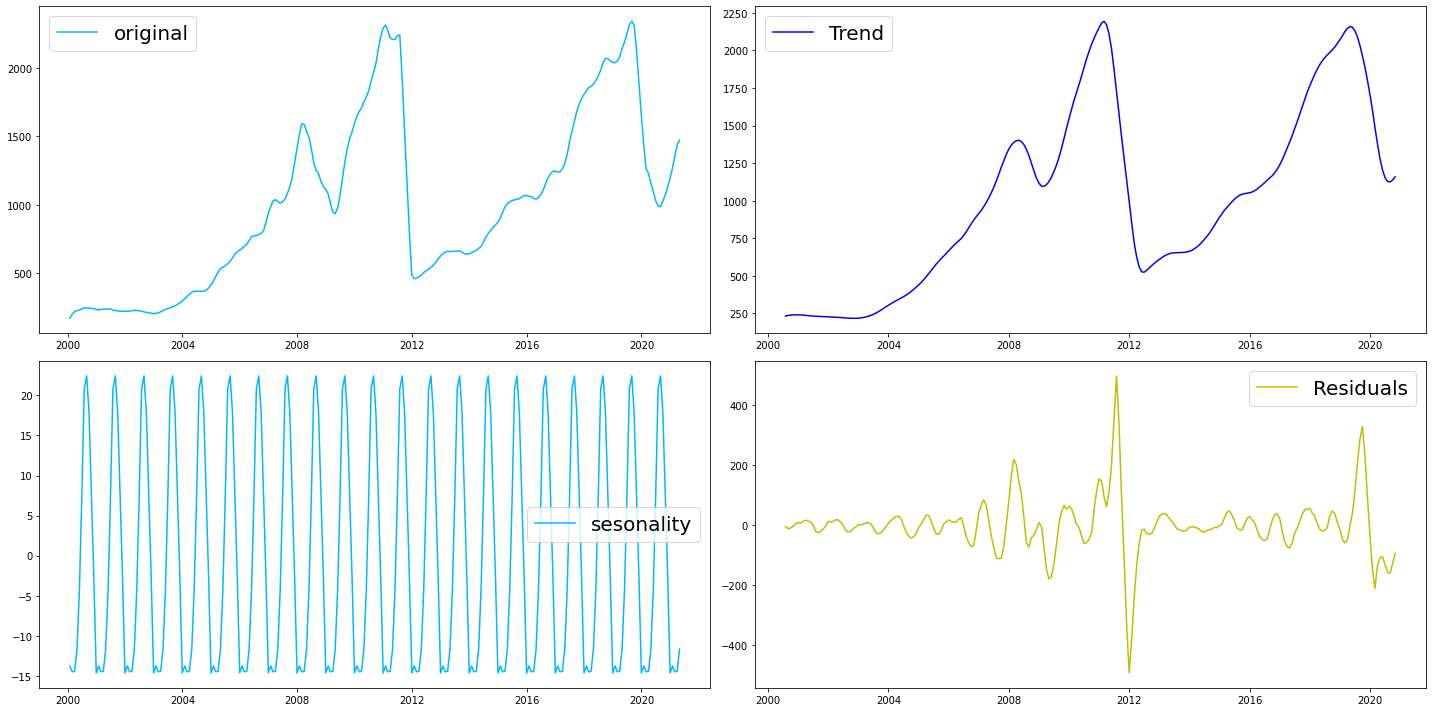

In [20]:
plt.figure(figsize=(20,10))
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

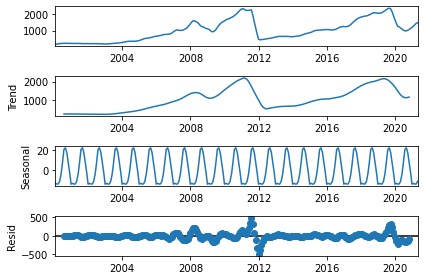

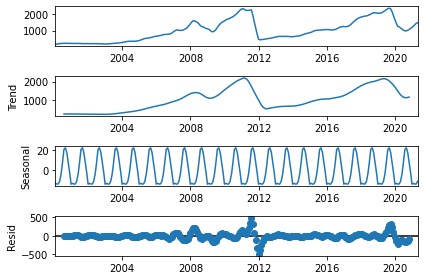

In [21]:
decomposition.plot()

In [22]:
from pmdarima.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff (df2)

(0.015080720157872483, False)

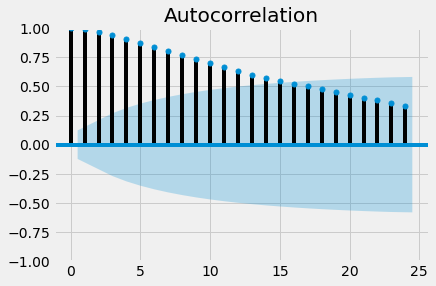

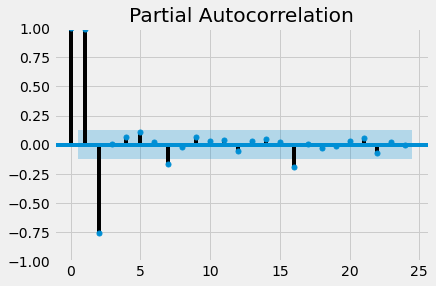

In [23]:
# Loading the packages
import pandas as pd
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df2, lags=24)
plt.show()

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(df2, lags=24)
plt.show()

In [24]:
train,test=df2[:240],df2[240:]
train.shape
test.shape

(240, 1)

(16, 1)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The Train vs Train of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Train Data vs Test Data')

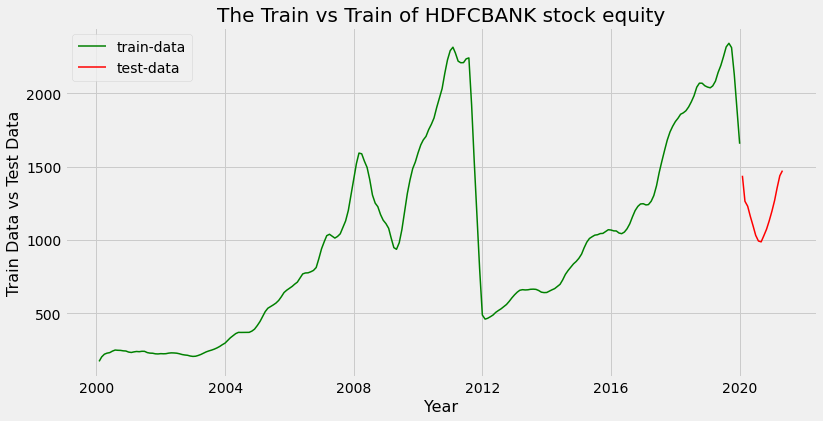

In [25]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The Train vs Train of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Train Data vs Test Data', fontsize=16)
plt.plot(train, color='green',linewidth=1.5)
plt.plot(test,color='red',linewidth=1.5)
plt.legend(labels =['train-data', 'test-data'], fontsize=14)
plt.show()

In [26]:
#fitting a stepwise model:
Arima_model=auto_arima(train,start_p=0,start_q=2,max_p=13,max_q=4,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2362.154, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2691.358, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2377.021, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2486.013, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2691.409, Time=0.01 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2363.376, Time=0.71 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2363.270, Time=0.70 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2363.520, Time=0.97 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2486.480, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2336.580, Time=0.26 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2338.532, Time=0.71 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2338.532, Time=0.63 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2340.533, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2336.733, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0

In [27]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -1161.589
Date:                Tue, 12 Jul 2022   AIC                           2329.178
Time:                        04:06:03   BIC                           2339.607
Sample:                             0   HQIC                          2333.380
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2367      0.039     31.979      0.000       1.161       1.312
ar.L2         -0.4283      0.033    -13.142      0.000      -0.492      -0.364
sigma2       967.8329     18.142     53.348      0.000     932.275    1003.390
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             29032.25
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              12.75   Skew:                            -3.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction.columns=['Predicted_SMA_100']
prediction

,Predicted_SMA_100
Date,
2020-01-31,1462.938146
2020-02-29,1326.130102
2020-03-31,1239.481964
2020-04-30,1190.926929
2020-05-31,1167.995055
2020-06-30,1160.433833
2020-07-31,1160.905660
2020-08-31,1164.727888
2020-09-30,1169.252604


<Figure size 1080x720 with 0 Axes>

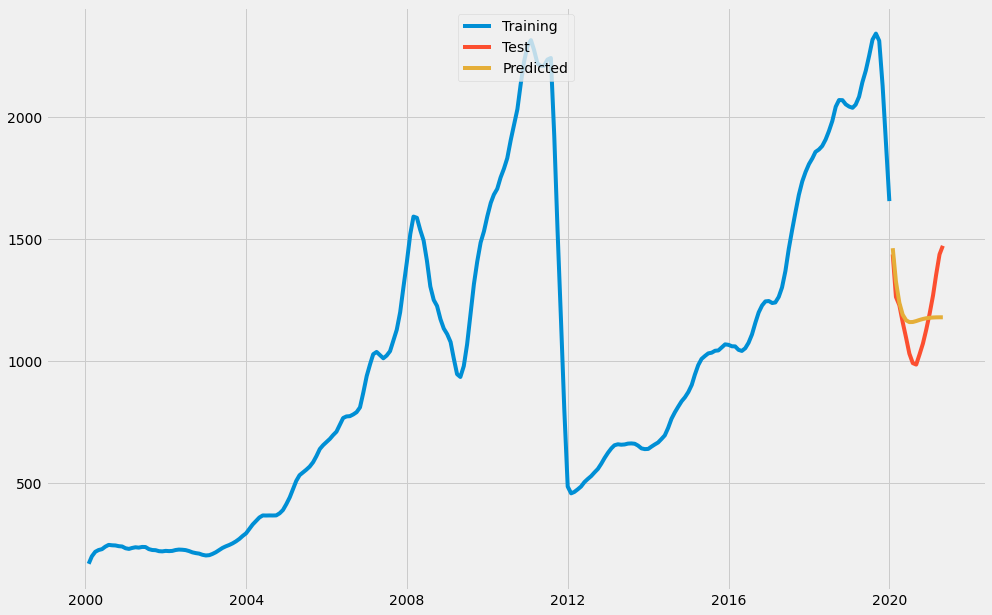

In [29]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [30]:
test['Predicted_SMA_100']=prediction
test['Error']=test['SMA_100']-test['Predicted_SMA_100']
test

,SMA_100,Predicted_SMA_100,Error
Date,,,
2020-01-31,1437.657500,1462.938146,-25.280646
2020-02-29,1263.377500,1326.130102,-62.752602
2020-03-31,1229.589357,1239.481964,-9.892607
2020-04-30,1160.611556,1190.926929,-30.315374
2020-05-31,1096.498895,1167.995055,-71.496160
2020-06-30,1031.276023,1160.433833,-129.157810
2020-07-31,992.578739,1160.905660,-168.326921
2020-08-31,986.668690,1164.727888,-178.059198
2020-09-30,1027.893409,1169.252604,-141.359195


**STEP6-EVALUATE MODEL PERFORMANCE for SMA_100ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [31]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.SMA_100,test.Predicted_SMA_100),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


112.245

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [32]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.SMA_100,test.Predicted_SMA_100),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


19404.283

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [33]:
import math
math.sqrt(mse)

139.2992569973006

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [34]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.SMA_100,test.Predicted_SMA_100),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


95.507

**Mean Absolute Percentage Error FOR TEST DATA**

In [35]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.SMA_100-test.Predicted_SMA_100)/test.SMA_100))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


9.417

,SMA_100
Date,
2000-01-31,5.143916
2000-02-29,5.307770
2000-03-31,5.396000
2000-04-30,5.427834
2000-05-31,5.443796


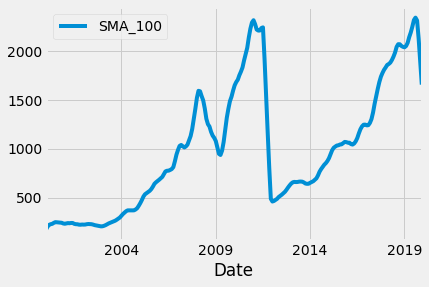

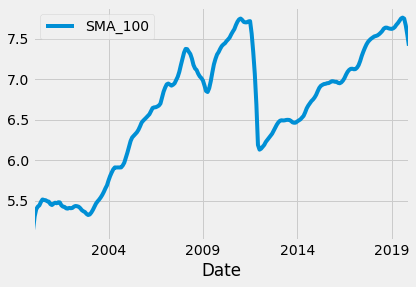

In [36]:
train_log=np.log(train)
train_log.head()
train.plot()
train_log.plot()
plt.show()

In [37]:
#fitting a stepwise model:
Arima_model=auto_arima(train_log,start_p=0,start_q=0,max_p=14,max_q=5,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-668.562, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-907.876, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-828.693, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-664.508, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-909.653, Time=0.19 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-907.861, Time=0.75 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-905.914, Time=0.66 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-920.636, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-918.757, Time=0.78 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=-918.754, Time=0.47 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-916.767, Time=0.90 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=-918.789, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-919.692, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-919.901, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0

In [38]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 463.817
Date:                Tue, 12 Jul 2022   AIC                           -921.635
Time:                        04:06:28   BIC                           -911.205
Sample:                             0   HQIC                          -917.432
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0075      0.040     25.379      0.000       0.930       1.085
ar.L2         -0.2322      0.052     -4.468      0.000      -0.334      -0.130
sigma2         0.0012   3.03e-05     39.707      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):             26501.50
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             3.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
prediction_log=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction_log.columns=['Predicted_SMA_100']

In [40]:
prediction_log

,Predicted_SMA_100
Date,
2020-01-31,7.304276
2020-02-29,7.226866
2020-03-31,7.173877
2020-04-30,7.138467
2020-05-31,7.115095
2020-06-30,7.099772
2020-07-31,7.089761
2020-08-31,7.083233
2020-09-30,7.078980


In [41]:
prediction1=np.exp(prediction_log)
prediction1

,Predicted_SMA_100
Date,
2020-01-31,1486.642963
2020-02-29,1375.904054
2020-03-31,1304.894267
2020-04-30,1259.495723
2020-05-31,1230.401058
2020-06-30,1211.690611
2020-07-31,1199.620492
2020-08-31,1191.814843
2020-09-30,1186.757779


In [42]:
test['log_prediction']=prediction1
test['Error_log']=test['SMA_100']-test['log_prediction']
#test=test.drop(['train_log'],axis=1)
test.head()

,SMA_100,Predicted_SMA_100,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1437.657500,1462.938146,-25.280646,1486.642963,-48.985463
2020-02-29,1263.377500,1326.130102,-62.752602,1375.904054,-112.526554
2020-03-31,1229.589357,1239.481964,-9.892607,1304.894267,-75.304910
2020-04-30,1160.611556,1190.926929,-30.315374,1259.495723,-98.884167
2020-05-31,1096.498895,1167.995055,-71.496160,1230.401058,-133.902163


**STEP6-EVALUATE MODEL PERFORMANCE for SMA_100ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [43]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.SMA_100,prediction1),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


138.745

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [44]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.SMA_100,prediction1),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


24987.273

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [45]:
import math
math.sqrt(mse)

158.0736315771862

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [46]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.SMA_100,prediction1),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


123.214

**Mean Absolute Percentage Error FOR TEST DATA**

In [47]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.SMA_100-prediction1)/test.SMA_100))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


2020-01-31 00:00:00   NaN
2020-02-29 00:00:00   NaN
2020-03-31 00:00:00   NaN
2020-04-30 00:00:00   NaN
2020-05-31 00:00:00   NaN
2020-06-30 00:00:00   NaN
2020-07-31 00:00:00   NaN
2020-08-31 00:00:00   NaN
2020-09-30 00:00:00   NaN
2020-10-31 00:00:00   NaN
2020-11-30 00:00:00   NaN
2020-12-31 00:00:00   NaN
2021-01-31 00:00:00   NaN
2021-02-28 00:00:00   NaN
2021-03-31 00:00:00   NaN
2021-04-30 00:00:00   NaN
Predicted_SMA_100     NaN
dtype: float64

In [48]:
test.head()

,SMA_100,Predicted_SMA_100,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1437.657500,1462.938146,-25.280646,1486.642963,-48.985463
2020-02-29,1263.377500,1326.130102,-62.752602,1375.904054,-112.526554
2020-03-31,1229.589357,1239.481964,-9.892607,1304.894267,-75.304910
2020-04-30,1160.611556,1190.926929,-30.315374,1259.495723,-98.884167
2020-05-31,1096.498895,1167.995055,-71.496160,1230.401058,-133.902163


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

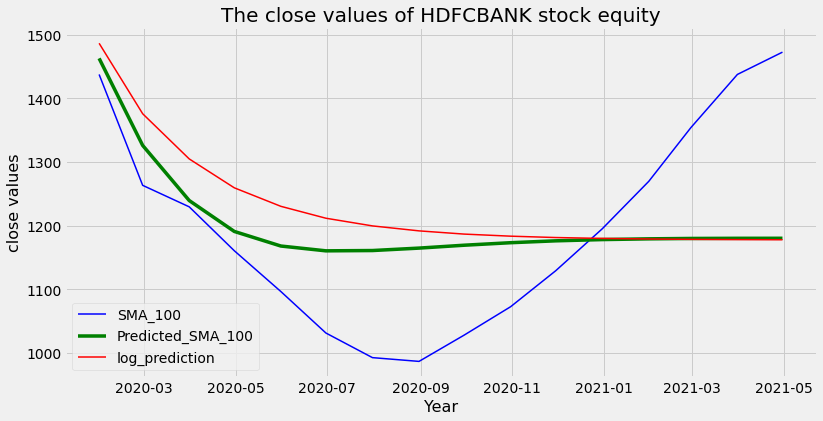

In [49]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(test.index,test['SMA_100'],color='b',linewidth=1.5)
plt.plot(test.index,test['Predicted_SMA_100'],color='g',linewidth=3.5)
plt.plot(test.index,test['log_prediction'],color='r',linewidth=1.5)
plt.legend(labels =['SMA_100', 'Predicted_SMA_100','log_prediction'], fontsize=14)
plt.show()

In [50]:
!jupyter nbconvert SMA_100ARIMA_StockMarketPrediction.ipynb

[NbConvertApp] Converting notebook SMA_100ARIMA_StockMarketPrediction.ipynb to html
[NbConvertApp] Writing 1306068 bytes to SMA_100ARIMA_StockMarketPrediction.html
